STOCK PRICE PREDICTION - ASIANPAINTS DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv("AsianPaint.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.00,370.00,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.00,375.00,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.00,371.50,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.90,374.50,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.00,370.00,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458


In [3]:
data = df['Close'].values.reshape(-1, 1)

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [5]:
# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.7)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

In [6]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:(i + seq_length)]
        label = data[i + seq_length]
        x.append(seq)
        y.append(label)
    return np.array(x), np.array(y)

In [7]:
# Set sequence length
seq_length = 10

In [8]:
# Create sequences for training
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
116/116 [==============================] - 13s 20ms/step - loss: 0.0053
Epoch 2/100
116/116 [==============================] - 2s 19ms/step - loss: 0.0012
Epoch 3/100
116/116 [==============================] - 2s 19ms/step - loss: 0.0011
Epoch 4/100
116/116 [==============================] - 2s 19ms/step - loss: 0.0010
Epoch 5/100
116/116 [==============================] - 2s 19ms/step - loss: 9.3620e-04
Epoch 6/100
116/116 [==============================] - 2s 19ms/step - loss: 8.8653e-04
Epoch 7/100
116/116 [==============================] - 2s 19ms/step - loss: 9.0404e-04
Epoch 8/100
116/116 [==============================] - 2s 20ms/step - loss: 7.3053e-04
Epoch 9/100
116/116 [==============================] - 2s 19ms/step - loss: 6.9421e-04
Epoch 10/100
116/116 [==============================] - 2s 19ms/step - loss: 5.8736e-04
Epoch 11/100
116/116 [==============================] - 2s 19ms/step - loss: 6.2156e-04
Epoch 12/100
116/116 [==============================] - 

In [11]:
# Make predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

50/50 [==============================] - 3s 10ms/step


In [12]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(df['Close'][train_size + seq_length:], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 26.14298643664635


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17424\1449282614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


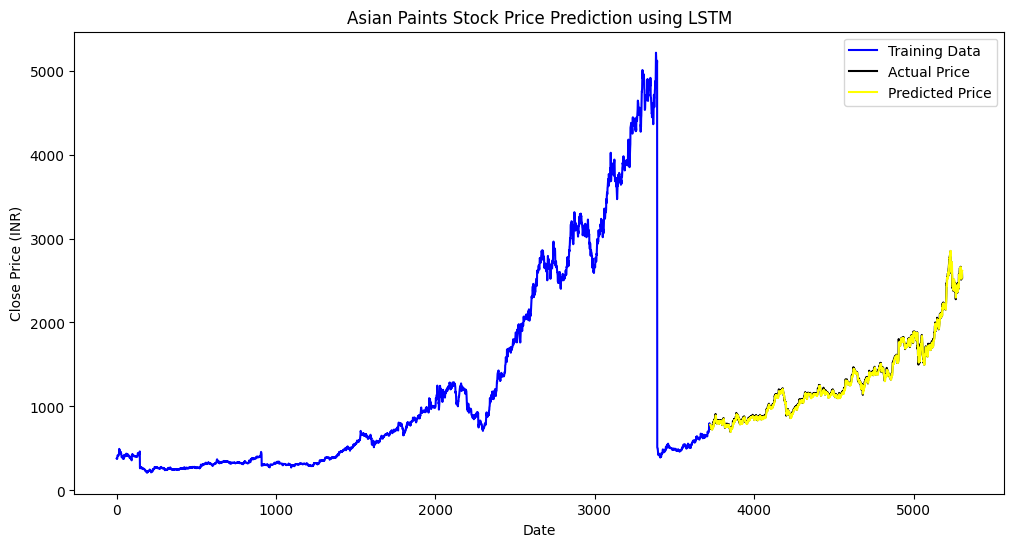

In [20]:
# Plotting the Results
train = df[:train_size + seq_length]
validation = df[train_size + seq_length:]
validation['Predictions'] = predictions

plt.figure(figsize=(12, 6))
plt.title('Asian Paints Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

# Plotting training data in blue
plt.plot(train['Close'], label='Training Data', color='blue')

# Plotting actual closing prices in orange
plt.plot(validation['Close'], label='Actual Price', color='black')

# Plotting predicted closing prices in green
plt.plot(validation['Predictions'], label='Predicted Price', color='yellow')

plt.legend()
plt.show()
